# **1. Configuración del Ambiente**


---

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
global df_items_pedidos, df_pedidos, df_productos, df_vendedores, database

# **2. Obtención de datos (Motor DB)**


---

In [9]:
# Conectar a la base de datos
engine = create_engine('sqlite:///database.db')

# Definir la consulta SQL
consulta_sql = text("""
    SELECT
        nombre_vendedor,
        SUM((strftime('%Y', fecha_compra) = '2019') * (total - costo_envio)) AS "Año 2019",
        SUM((strftime('%Y', fecha_compra) = '2020') * (total - costo_envio)) AS "Año 2020",
        SUM((strftime('%Y', fecha_compra) = '2021') * (total - costo_envio)) AS "Año 2021"
    FROM
        pedidos p
    INNER JOIN
        items_pedidos ip ON p.pedido_id = ip.pedido_id
    INNER JOIN
        vendedores v ON p.vendedor_id = v.vendedor_id
    GROUP BY
        nombre_vendedor;
""")

# Ejecutar la consulta SQL y cargar los resultados en un DataFrame
with engine.connect() as connection:
    consulta_vendedor = connection.execute(consulta_sql)
    df_ingreso_vendedor = pd.DataFrame(consulta_vendedor, columns=['nombre_vendedor', 'Año 2019', 'Año 2020', 'Año 2021'])

In [10]:

# Mostrar el DataFrame
print(df_ingreso_vendedor)

   nombre_vendedor   Año 2019   Año 2020  Año 2021
0       Ana Duarte  2154261.6  5054009.6  547470.4
1  Daniel Siqueira  2020503.2  5266932.8  419702.4
2  Millena Pereira  2054682.4  3804385.6  398896.0
3   Nadia Oliveira  2296986.4  4046902.4  810020.0
4    Paulo Calanca  3702835.2  3609530.4  455401.6


# **3. ¿Cuáles son los ingresos netos por vendedor por año?**


---

In [11]:
# Establecer la columna 'nombre_vendedor' como el índice del DataFrame
df_ingreso_vendedor.set_index('nombre_vendedor', inplace=True)

In [12]:
# Crear un DataFrame con los nombres de los vendedores
nombres = [nombre.split()[0] for nombre in df_ingreso_vendedor.index]
df_nombres = pd.DataFrame(nombres, columns=['nombre'])

# Imprimir el DataFrame de nombres de vendedores
print(df_nombres)

    nombre
0      Ana
1   Daniel
2  Millena
3    Nadia
4    Paulo


In [13]:
print(df_ingreso_vendedor.info())
print("------------------------")
print(df_ingreso_vendedor.head())

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Ana Duarte to Paulo Calanca
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Año 2019  5 non-null      float64
 1   Año 2020  5 non-null      float64
 2   Año 2021  5 non-null      float64
dtypes: float64(3)
memory usage: 160.0+ bytes
None
------------------------
                  Año 2019   Año 2020  Año 2021
nombre_vendedor                                
Ana Duarte       2154261.6  5054009.6  547470.4
Daniel Siqueira  2020503.2  5266932.8  419702.4
Millena Pereira  2054682.4  3804385.6  398896.0
Nadia Oliveira   2296986.4  4046902.4  810020.0
Paulo Calanca    3702835.2  3609530.4  455401.6


C:\Users\eddwi\AppData\Local\Temp\ipykernel_20212\2197470808.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.text(ingresos_2019[0] / 2, pos[0] + 4.8, '2019', ha='center', va='center', fontweight='bold', color='black', fontsize=12)
C:\Users\eddwi\AppData\Local\Temp\ipykernel_20212\2197470808.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.text(ingresos_2019[0] + ingresos_2020[0] / 2, pos[0] + 4.8, '2020', ha='center', va='center', fontweight='bold', color='black', fontsize=12)
C:\Users\eddwi\AppData\Local\Temp\ipykernel_20212\2197470808.py:44: FutureWarning: Series.__getitem__ treating keys as positi

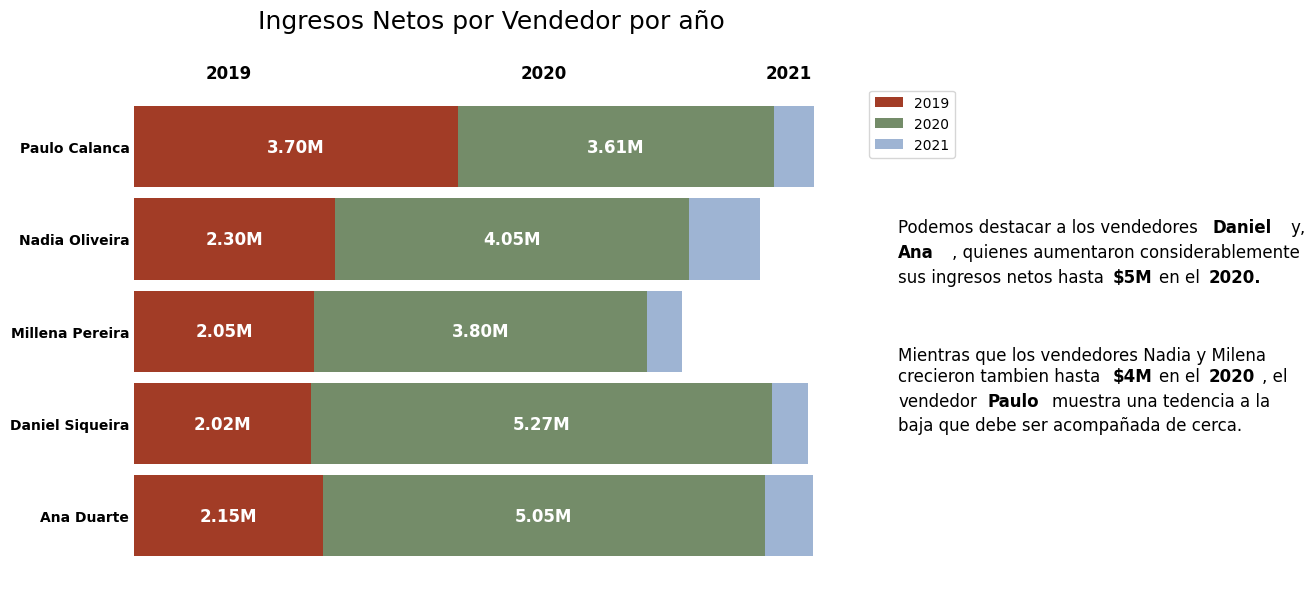

In [14]:
# Obtener los nombres de los vendedores
vendedores = df_ingreso_vendedor.index

# Obtener los valores de los ingresos netos por año
ingresos_2019 = df_ingreso_vendedor['Año 2019']
ingresos_2020 = df_ingreso_vendedor['Año 2020']
ingresos_2021 = df_ingreso_vendedor['Año 2021']

# Crear el gráfico de barras horizontales apiladas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})

# Posición de los vendedores en el gráfico
pos = np.arange(len(vendedores))

# Crear las barras horizontales apiladas con barras más anchas
bar_width = 0.88
# Colores más modernos
colors = ['#A23C26', '#748C69', '#9EB4D3']

# Crear las barras horizontales apiladas con colores
bar_2019 = ax1.barh(pos, ingresos_2019, height=bar_width, color=colors[0], label='Año 2019')
bar_2020 = ax1.barh(pos, ingresos_2020, left=ingresos_2019, height=bar_width, color=colors[1], label='Año 2020')
bar_2021 = ax1.barh(pos, ingresos_2021, left=ingresos_2019+ingresos_2020, height=bar_width, color=colors[2], label='Año 2021')


# Configurar el título y las etiquetas de los ejes
ax1.set_title('Ingresos Netos por Vendedor por año', fontsize=18, pad=40)  # Tamaño del título y separación
ax1.set_yticks(pos)
ax1.set_yticklabels(vendedores, fontweight='bold')  # Agregar los nombres de los vendedores en el eje y en negrita
ax1.xaxis.set_visible(False)

# Mostrar los valores de ingresos netos en negrita y con un tamaño de fuente mayor en cada barra
for b2019, b2020, b2021, vendedor in zip(bar_2019, bar_2020, bar_2021, vendedores):
    ax1.text(b2019.get_x() + b2019.get_width() / 2, b2019.get_y() + b2019.get_height() / 2,
             f'{b2019.get_width() / 1e6:.2f}M', ha='center', va='center', color='white', fontweight='bold', fontsize=12)
    ax1.text(b2020.get_x() + b2020.get_width() / 2, b2020.get_y() + b2020.get_height() / 2,
             f'{b2020.get_width() / 1e6:.2f}M', ha='center', va='center', color='white', fontweight='bold', fontsize=12)
    #ax1.text(b2021.get_x() + b2021.get_width() / 2, b2021.get_y() + b2021.get_height() / 2,
         #    f'{b2021.get_width() / 1e6:.2f}M', ha='center', va='center', color='white', fontweight='bold', fontsize=12)

# Agregar los años encima de la primera barra
ax1.text(ingresos_2019[0] / 2, pos[0] + 4.8, '2019', ha='center', va='center', fontweight='bold', color='black', fontsize=12)
ax1.text(ingresos_2019[0] + ingresos_2020[0] / 2, pos[0] + 4.8, '2020', ha='center', va='center', fontweight='bold', color='black', fontsize=12)
ax1.text(ingresos_2019[0] + ingresos_2020[0] + ingresos_2021[0] / 2, pos[0] + 4.8, '2021', ha='center', va='center', fontweight='bold', color='black', fontsize=12)

# Agregar leyenda de las barras en la figura 2
ax2.legend(handles=[bar_2019, bar_2020, bar_2021], labels=['2019', '2020', '2021'], loc='upper left')

# Configurar la segunda figura (espacio para texto)
ax2.axis('off')  # Eliminar ejes
# Crear comentarios del análisis del gráfico
analisis = "Mientras que los vendedores Nadia y Milena\ncrecieron tambien hasta "
ax2.text(0.1, 0.7, "Podemos destacar a los vendedores ", fontsize=12)
ax2.text(0.98, 0.7, "{}".format(df_nombres.loc[1, 'nombre']), fontsize=12, fontweight="bold")
ax2.text(1.2, 0.7, "y,", fontsize=12)
ax2.text(0.1, 0.65, "{}".format(df_nombres.loc[0, 'nombre']), fontsize=12, fontweight="bold")
ax2.text(0.25, 0.65, ", quienes aumentaron considerablemente", color="k", fontsize=12)
ax2.text(0.1, 0.6, "sus ingresos netos hasta", color="k", fontsize=12)
ax2.text(0.7, 0.6, "${:.0f}M".format(df_ingreso_vendedor.loc["Ana Duarte", "Año 2020"]/1e6), fontsize=12, fontweight="bold")
ax2.text(0.83, 0.6, "en el ", fontsize=12)
ax2.text(0.97, 0.6, "{}.".format(df_ingreso_vendedor.columns[1].split()[1]), fontsize=12, fontweight="bold")
ax2.text(0.1, 0.4, analisis, fontsize=12)
ax2.text(0.7, 0.4, "${:.0f}M".format(df_ingreso_vendedor.loc["Nadia Oliveira", "Año 2020"]/1e6), fontsize=12, fontweight="bold")
ax2.text(0.83, 0.4, "en el ", fontsize=12)
ax2.text(0.97, 0.4, "{}".format(df_ingreso_vendedor.columns[1].split()[1]), fontsize=12, fontweight="bold")
ax2.text(1.12, 0.4, ", el", fontsize=12)
ax2.text(0.1, 0.35, "vendedor", fontsize=12)
ax2.text(0.35, 0.35, "{}".format(df_nombres.loc[4, 'nombre']), fontsize=12, fontweight="bold")

ax2.text(0.53, 0.35, "muestra una tedencia a la", fontsize=12, color="k")
ax2.text(0.1, 0.3, "baja que debe ser acompañada de cerca.", fontsize=12)



# Ajustar la relación de aspecto entre las dos figuras
plt.subplots_adjust(wspace=0.9)

# Eliminar los bordes y los ejes de la figura 1
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.tick_params(axis='both', which='both', length=0)

# Eliminar la palabra "Vendedores" del eje y
ax1.set_ylabel('')

# Eliminar el borde de la figura 1
ax1.set_frame_on(False)



# Mostrar el gráfico
plt.tight_layout()
plt.show()
